In [82]:
import os
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

In [83]:
df = read_data()

In [84]:
model = sort_important_features(df)

feature: adverb, importance: 0.10506300118082937
feature: laughter, importance: 0.10083042503331431
feature: posemo_4q, importance: 0.08545326229234174
feature: interrog, importance: 0.0693840109315762
feature: anx_3q, importance: 0.04562470903225812
feature: posemo_1q, importance: 0.034836139472888196
feature: negemo_change_q, importance: 0.02839814080455868
feature: informal, importance: 0.027729378790319777
feature: function, importance: 0.02581962750523684
feature: time, importance: 0.022451227995149946
feature: power, importance: 0.02193563770554067
feature: cogproc, importance: 0.021841020077493764
feature: WPS, importance: 0.018538341339381845
feature: achieve, importance: 0.018054660845909874
feature: HarmVirtue, importance: 0.01730922064920954
feature: compare, importance: 0.01579873041181514
feature: sad_1h, importance: 0.015466475899959465
feature: you, importance: 0.014835597710310474
feature: ppron, importance: 0.014795182983728627
feature: percept, importance: 0.012545650

In [86]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [87]:
print_tree(model)

## Random Forest

In [88]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    predictors = np.array(predictors)
    
    
    plt.figure(figsize=(30,30))
    matplotlib.rcParams.update({'font.size': 16})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')

    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [89]:
rf, importances, names = sort_important_features(df)

feature: laughter, importance: 0.11478701601818213
feature: interrog, importance: 0.07237595217147255
feature: affiliation, importance: 0.03239444476439457
feature: adverb, importance: 0.028866192647551726
feature: power, importance: 0.026313733268211466
feature: article, importance: 0.02536046386806881
feature: sexual, importance: 0.024260864869927685
feature: achieve, importance: 0.022187430885888343
feature: anx_3q, importance: 0.02062981271316877
feature: affect_2q, importance: 0.020322691313907536
feature: you, importance: 0.016843988356470448
feature: anx, importance: 0.016746906073697995
feature: focuspresent, importance: 0.01580433505576599
feature: informal, importance: 0.015106914342960177
feature: ppron, importance: 0.015089843147412237
feature: negemo_change_q, importance: 0.014831531510476592
feature: tentat, importance: 0.014108653479564932
feature: posemo_2h, importance: 0.01407240141213493
feature: reward, importance: 0.013645868508325134
feature: negemo_change_h, impor

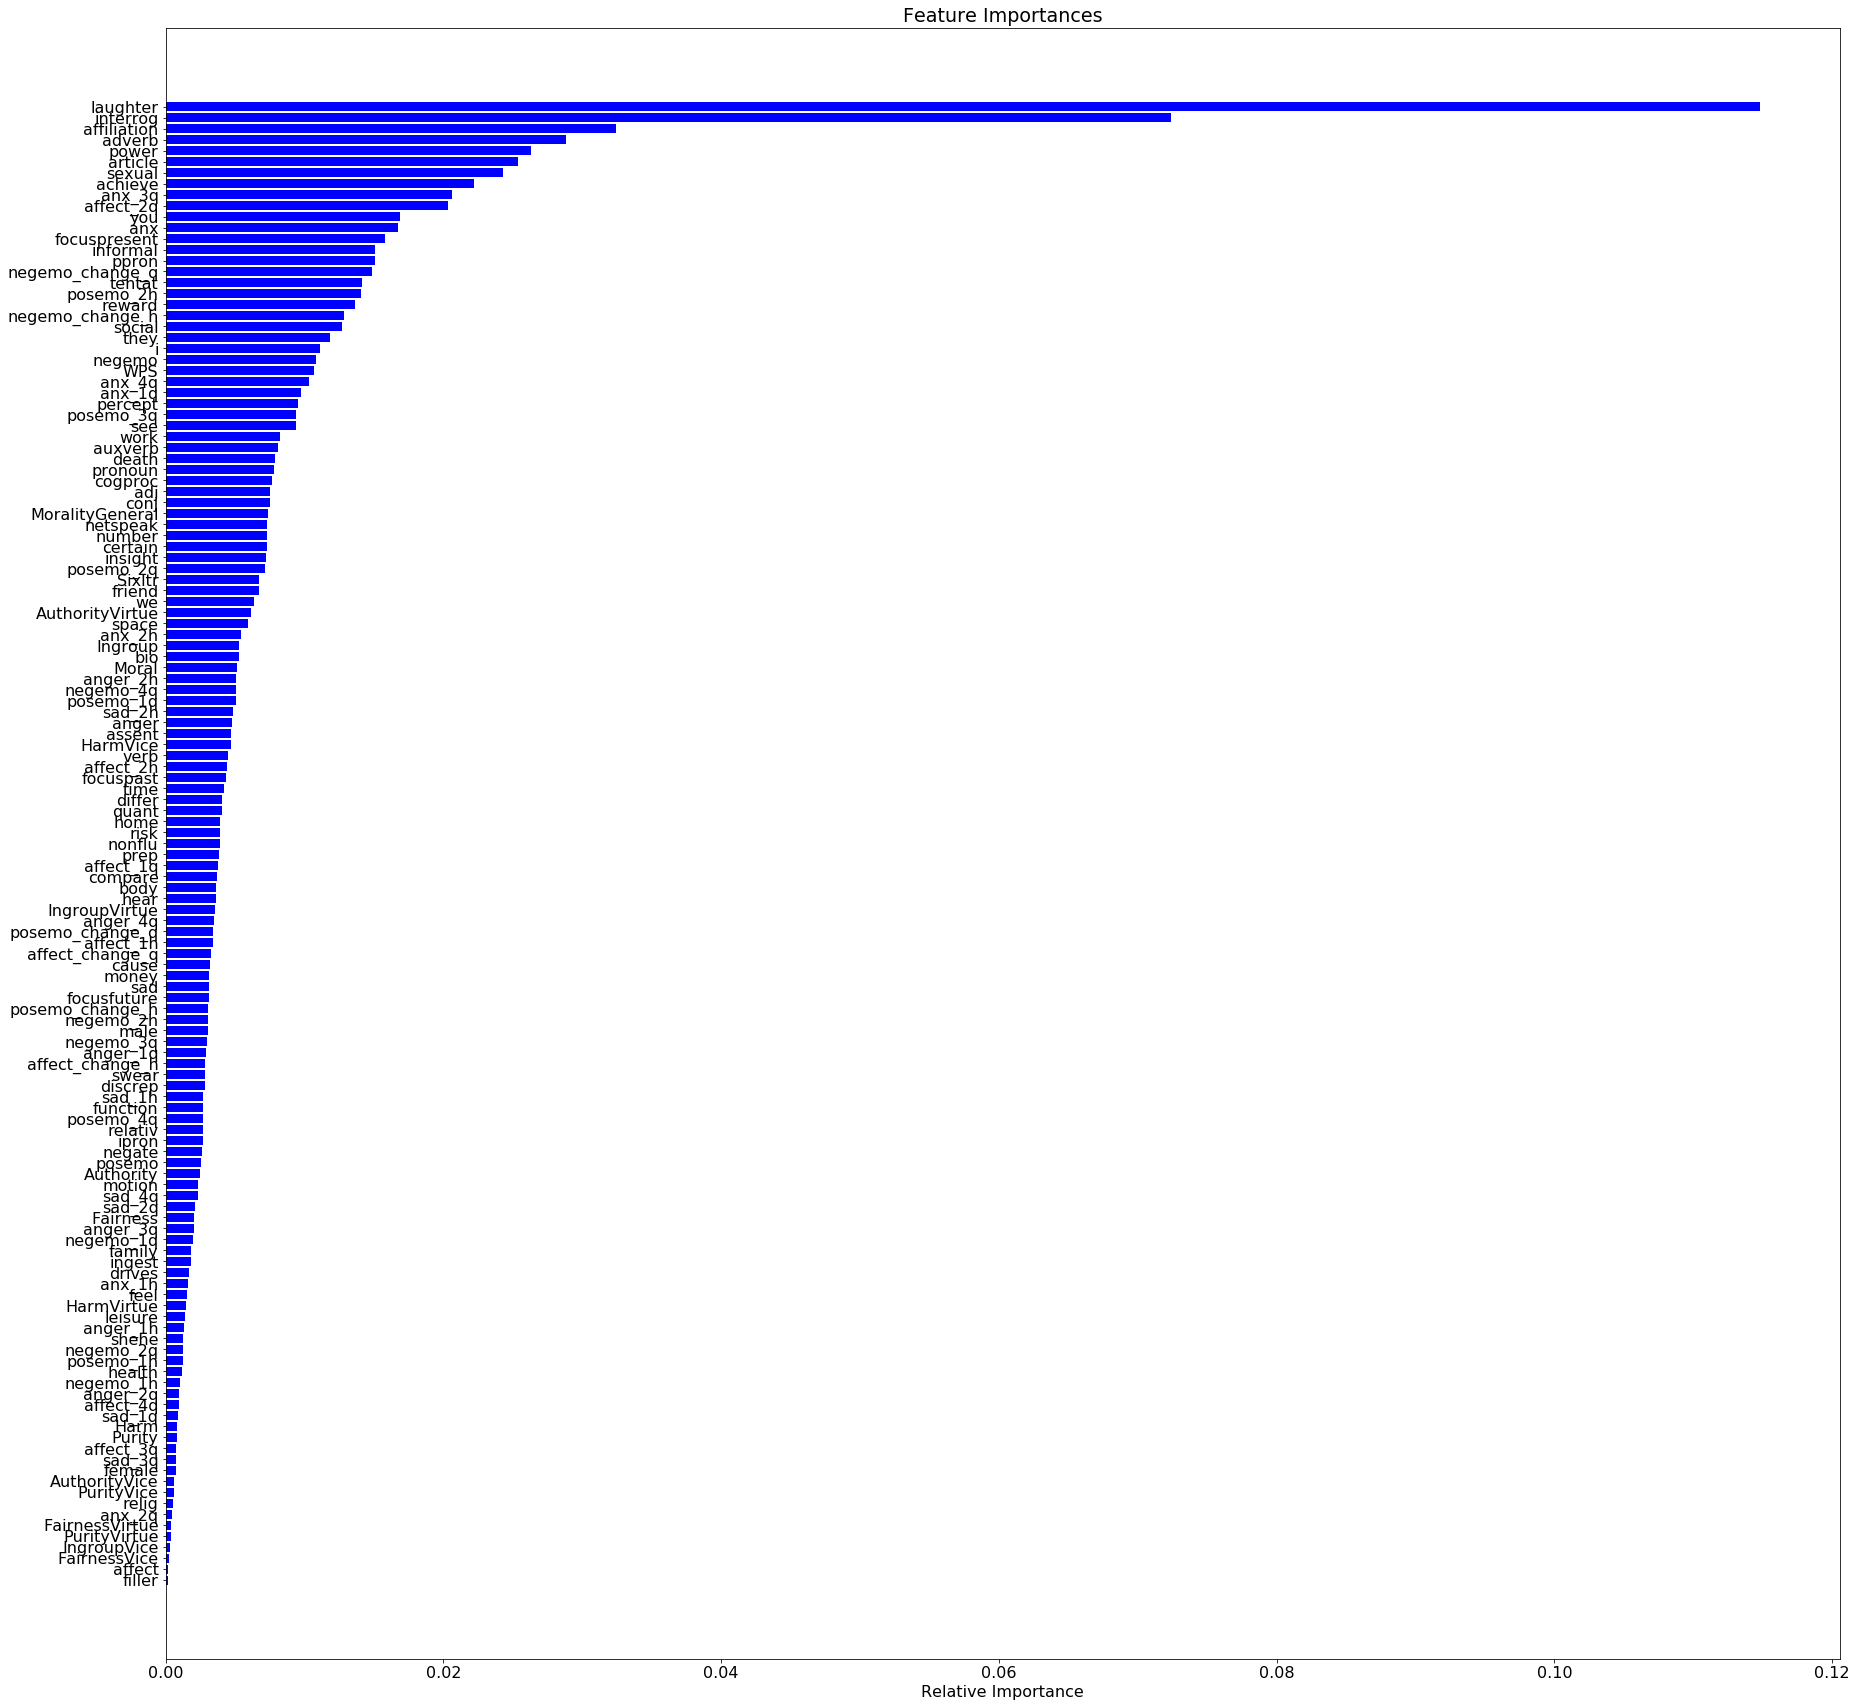

In [90]:
plot_feature_importances(df, importances, names)

## Linear Regression

In [20]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

/Users/owentemple/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [146]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['laughter', 'interrog', 'anx_3q',  'you', 'posemo_4q', 'time', 'informal', 'HarmVirtue']
    lr.fit(df[predictors], df['views'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['views'], X2)
    est2 = est.fit()
    print(est2.summary())

In [147]:
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     37.79
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           6.25e-57
Time:                        18:03:05   Log-Likelihood:                -38752.
No. Observations:                2406   AIC:                         7.752e+04
Df Residuals:                    2397   BIC:                         7.757e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.185e+05   2.86e+05     -1.813      0.0